In [161]:
# setup random indicies
import numpy as np

np.random.seed(9)

house_ids = range(1,1461)
random_id = np.random.choice(house_ids, 1460, replace = False)


# load df
import pandas as pd
df = pd.read_csv("../../data/train_model.csv")

# randomized index
df.drop(columns = ['Unnamed: 0', 'Id'], inplace = True)
df['random_id'] = random_id
df.set_index('random_id', inplace = True)
df.sort_index(inplace=True)

# remove outliers
df.drop([907, 465], inplace=True)

# log transform SalePrice
df['SalePrice'] = np.log(df.SalePrice)

df.head(5)

,LotFrontage,LotArea,YearBuilt,GrLivArea,YrSold,SalePrice,MSZoning_RL,MSZoning_RMH,Alley_NoAccess,LotShape_Regular,...,OpenPorchSF_OpenPorch_Yes,Fence_no_fence,MoSold_peak_months,SaleType_non_deed,SaleCondition_not_normal,IsVinyl_yes,FullBaths_<=1FullBath,FullBaths_>=3FullBaths,HalfBaths_>=1HalfBaths,Enclosed_combined_EnclosedPorch_Yes
random_id,,,,,,,,,,,,,,,,,,,,,
1,87.0,9246,37,1656,2008,11.813030,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,60.0,7200,60,1904,2009,11.835009,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,74.0,8532,56,1297,2009,11.938193,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
4,47.0,53504,7,3279,2010,13.195614,1,0,1,0,...,1,1,1,0,0,0,0,1,1,1
5,82.0,9430,11,2365,2009,12.727838,1,0,1,1,...,1,1,1,0,0,1,0,1,1,1


In [162]:
df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'YrSold',
       'SalePrice', 'MSZoning_RL', 'MSZoning_RMH', 'Alley_NoAccess',
       'LotShape_Regular', 'LandContour_Unflat', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'LandSlope_NGtl', 'Neighborhood_NAmes',
       'Neighborhood_SAmes', 'Condition1_NormP', 'BldgType_OneFamily',
       'BldgType_Townhouse', 'HouseStyle_OneStoryUp', 'OverallQual_HighQ',
       'OverallQual_LowQ', 'OverallCond_BadC', 'OverallCond_GoodC',
       'RoofStyle_not_gable', 'MasVnrType_no_masvnr', 'ExterQual_low',
       'ExterCond_low', 'Foundation_pconc', 'BsmtQual_low', 'BsmtCond_low',
       'BsmtExposure_no_exposure', 'BsmtFinType1_undeveloped',
       'TotalBsmtSF_mhigh', 'TotalBsmtSF_mlow', 'TotalBsmtSF_small',
       'HeatingQC_low', 'CentralAir_NoCentAir', 'Electrical_StdCBrkr',
       'BedroomAbvGr_=3Bedr', 'BedroomAbvGr_>=4Bedr', 'KitchenAbvGr_>=2Ktchn',
       'KitchenQual_ExKtchnQ', 'KitchenQual_GdKtchnQ',
       'TotRmsAbvGrd_<=4Tot

In [163]:
df[df["YearBuilt"]==0]

,LotFrontage,LotArea,YearBuilt,GrLivArea,YrSold,SalePrice,MSZoning_RL,MSZoning_RMH,Alley_NoAccess,LotShape_Regular,...,OpenPorchSF_OpenPorch_Yes,Fence_no_fence,MoSold_peak_months,SaleType_non_deed,SaleCondition_not_normal,IsVinyl_yes,FullBaths_<=1FullBath,FullBaths_>=3FullBaths,HalfBaths_>=1HalfBaths,Enclosed_combined_EnclosedPorch_Yes
random_id,,,,,,,,,,,,,,,,,,,,,
543,88.0,11394,0,1856,2010,12.885202,1,0,1,1,...,0,1,1,1,1,1,0,0,1,0


In [164]:
test_1 = df.iloc[0:292,:]
test_2 = df.iloc[292:584,:]
test_3 = df.iloc[584:876,:]
test_4 = df.iloc[876:1168,:]
test_5 = df.iloc[1168:1460,:]
print(len(test_1))
print(len(test_2))
print(len(test_3))
print(len(test_4))
print(len(test_5)) # note 2 fewer due to dropped outliers above

292
292
292
292
290


In [3]:
group_test = test_1.copy()
group_train = pd.concat([test_2, test_3, test_4, test_5])

x_grouptrain = group_train.loc[:, group_train.columns != 'SalePrice']
y_grouptrain = group_train['SalePrice']

x_grouptest = group_test.loc[:, group_test.columns != 'SalePrice']
y_grouptest = group_test['SalePrice']

group_train.shape
#group_train.head(5)

(1166, 70)

In [4]:
p_test = test_2.copy()
p_train = pd.concat([test_1, test_3, test_4, test_5])

x_ptrain = p_train.loc[:, p_train.columns != 'SalePrice']
y_ptrain = p_train['SalePrice']

x_ptest = p_test.loc[:, p_test.columns != 'SalePrice']
y_ptest = p_test['SalePrice']

p_train.shape
#p_train.head(5)

(1166, 70)

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [6]:
x_df = df.loc[:, df.columns != 'SalePrice']
y_df = df['SalePrice']

In [7]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
x = sm.add_constant(x_df)
y = y_df
model_fit = sm.OLS(y, x).fit()
#print(model_fit.summary())

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

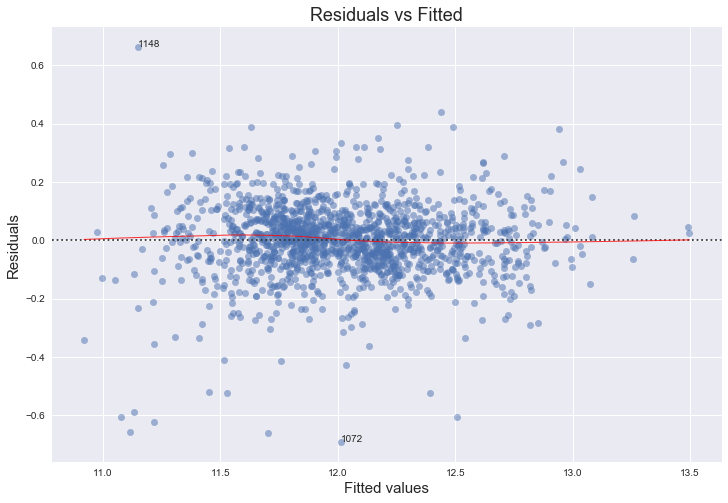

In [9]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'SalePrice',data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

#annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:2]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

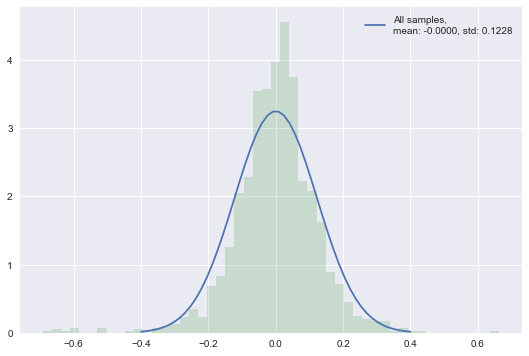

In [10]:
from scipy import stats
plt.figure(figsize=(9, 6))
#plt.xlim(-0.4, 0.4)
#plt.ylim(0, 4.3)
plt.hist(model_residuals, color='green', bins=50, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(model_residuals), np.std(model_residuals)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(model_residuals), np.std(model_residuals))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)
plt.legend()
plt.show()

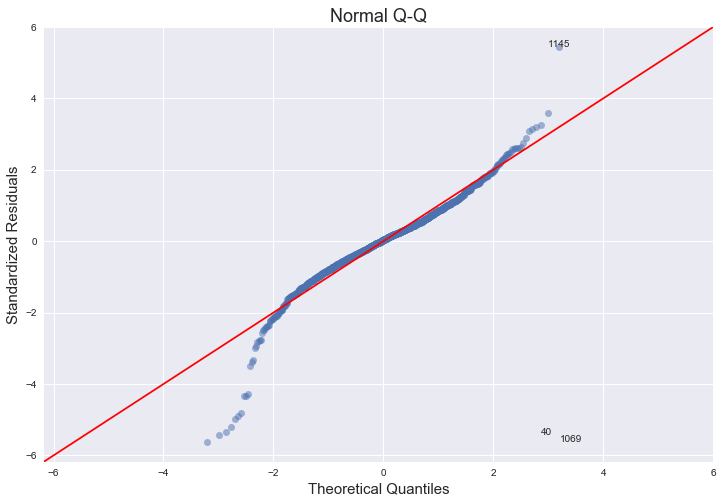

In [11]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

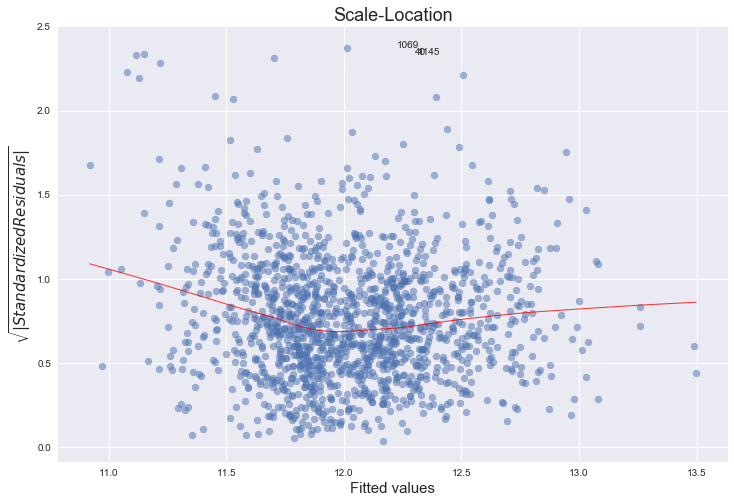

In [12]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

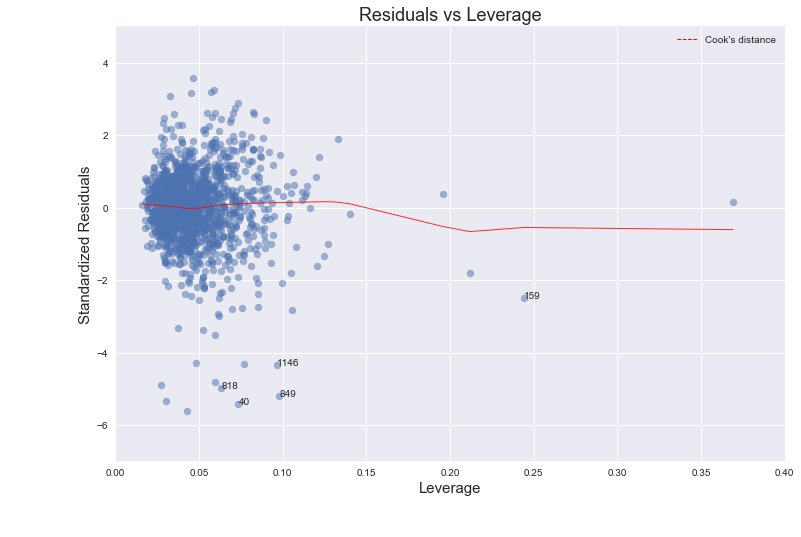

In [169]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.4)
plot_lm_4.axes[0].set_ylim(-7, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:6]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

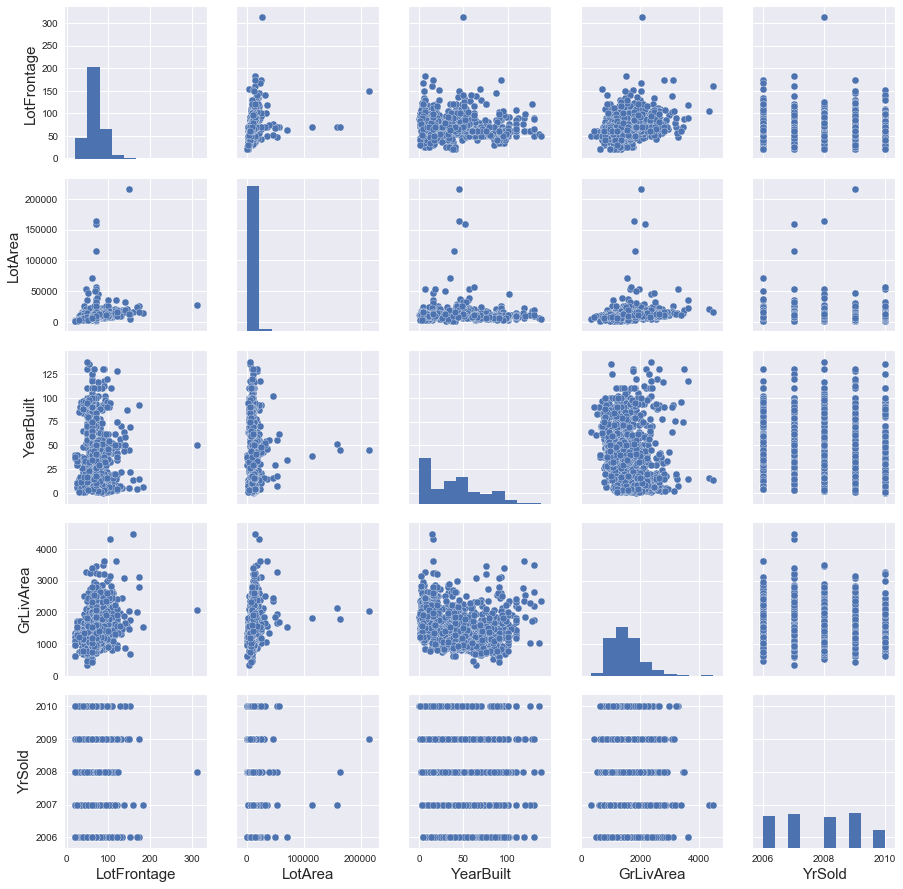

In [14]:
cont_feat = ['LotFrontage','LotArea','YearBuilt','GrLivArea','YrSold']
sns.pairplot(df[cont_feat])

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])], index = x_df.columns)
vif[vif>5]

YearBuilt                   6.907783e+00
GrLivArea                   5.185768e+00
MSZoning_RL                 5.185523e+00
MSZoning_RMH                5.096500e+00
BldgType_OneFamily          8.757272e+00
BldgType_Townhouse          7.715486e+00
GarageFinish_NoGarageFin    1.372109e+05
GarageCars_1                6.249899e+05
GarageCars_2                1.393827e+06
GarageCars_AtLeast3         3.132713e+05
dtype: float64

In [16]:
corr_matrix = df.corr()
corr = corr_matrix['SalePrice'].sort_values(ascending=False)
corr[abs(corr)>0.4]

SalePrice                    1.000000
GrLivArea                    0.725211
OverallQual_HighQ            0.609127
Foundation_pconc             0.531193
GarageCars_AtLeast3          0.524713
FullBaths_>=3FullBaths       0.519374
Neighborhood_NAmes           0.503646
OpenPorchSF_OpenPorch_Yes    0.449388
KitchenQual_ExKtchnQ         0.417469
KitchenQual_GdKtchnQ         0.406886
GarageCars_1                -0.425588
OverallQual_LowQ            -0.429371
GarageFinish_GarageUnf      -0.432143
FullBaths_<=1FullBath       -0.493877
Fireplaces_NoFireplace      -0.510253
GarageType_Detached         -0.537854
BsmtQual_low                -0.586562
YearBuilt                   -0.587043
ExterQual_low               -0.635358
Name: SalePrice, dtype: float64

## Model

In [ ]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x_df, y_df)
print("MLR RSS: %.2f" % np.sum(((y_df) - (ols.predict(x_df))) ** 2))
print("MLR MSE: %.3f" % (np.sum(((y_df) - (ols.predict(x_df))) ** 2)/len(y_df)))
print("MLR RMSE: %.4f" % np.sqrt(np.sum(((y_df) - (ols.predict(x_df))) ** 2)/len(y_df)))

## Ridge

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_df)
x_scale = scaler.transform(x_df)
x_scale

array([[ 0.81574508, -0.12316959, -0.05903553, ..., -0.54723417,
        -0.83979947, -0.55252331],
       [-0.46793508, -0.33076274,  0.70297279, ..., -0.54723417,
         1.19076045,  1.8098784 ],
       [ 0.19767686, -0.19561412,  0.5704496 , ..., -0.54723417,
         1.19076045, -0.55252331],
       ...,
       [ 1.33872589,  0.18223382, -0.75478226, ...,  1.82737126,
         1.19076045, -0.55252331],
       [ 1.19609476,  0.08980109,  0.76923438, ..., -0.54723417,
        -0.83979947, -0.55252331],
       [-0.46793508, -0.41173016,  1.69689669, ..., -0.54723417,
        -0.83979947,  1.8098784 ]])

In [52]:
# Ridge
from sklearn import linear_model
ridge = linear_model.Ridge(random_state=9)

alpha_ridge = np.logspace(0, 8, 100)
coef_ridge = []
for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(x_scale, y_df)
    coef_ridge.append(ridge.coef_)

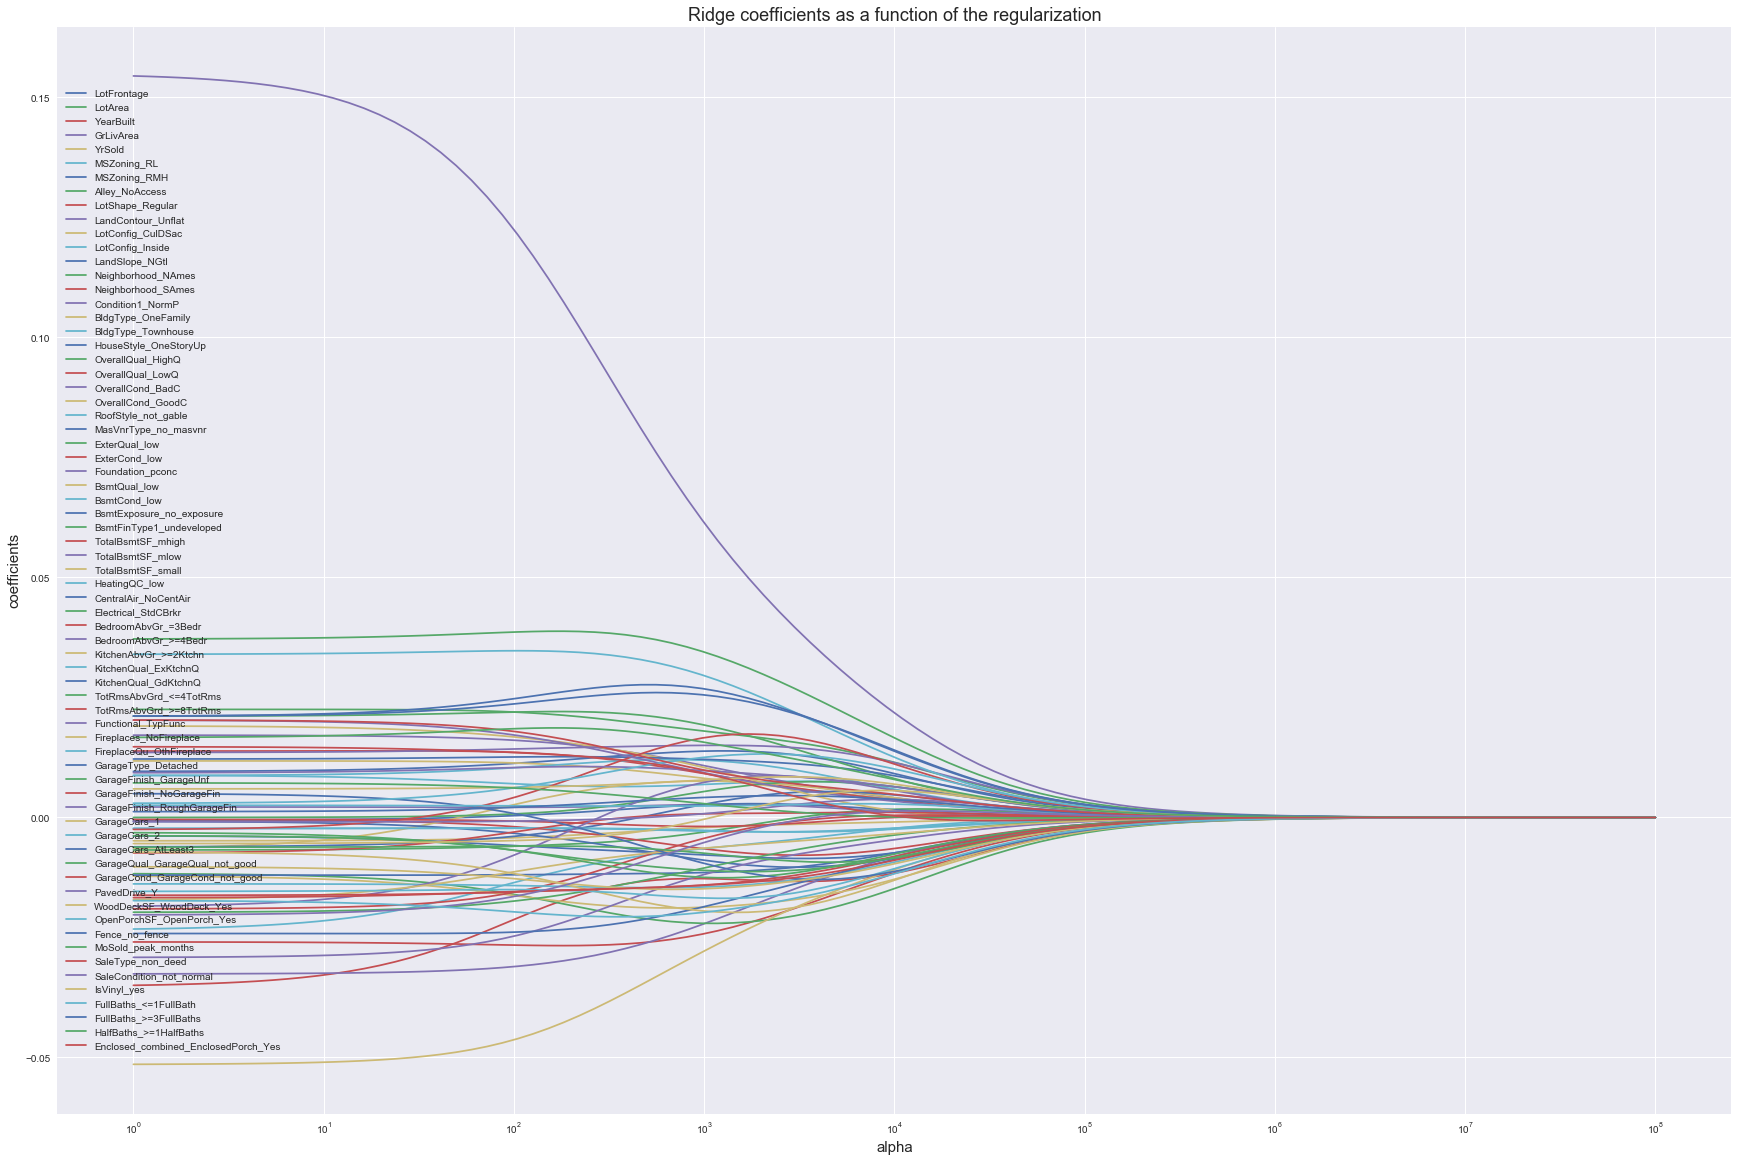

In [53]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30, 20)
df_coef_ridge = pd.DataFrame(coef_ridge, index=alpha_ridge, columns=x_df.columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef_ridge.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV
np.random.seed(9)
grid_param_ridge = [{'alpha': np.logspace(0, 8, 100)}]
para_search_ridge = GridSearchCV(estimator=ridge, param_grid=grid_param_ridge, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
para_search_ridge = para_search_ridge.fit(x_scale, y_df)

In [55]:
print('Ridge MSE:',-para_search_ridge.best_score_)
print(para_search_ridge.best_params_)
print('Ridge RMSE:',np.sqrt(-para_search_ridge.best_score_))

Ridge MSE: 0.017829594275780722
{'alpha': 59.94842503189412}
Ridge RMSE: 0.13352750381768067


In [22]:
#para_search_ridge.grid_scores_

In [56]:
from sklearn.model_selection import validation_curve
np.random.seed(9)
param_range_ridge = np.logspace(-5, 1, 100)
kwargs = dict(param_name='alpha', param_range=param_range_ridge)
train_scores, test_scores = validation_curve(ridge, x_scale, y_df,scoring='neg_mean_squared_error',cv=5,**kwargs)
train_scores_mean = np.mean(-train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)
print('test sd:',np.std(test_scores))
print('test MSE:',np.mean(-test_scores))
print('train MSE:',np.mean(-train_scores))

test sd: 0.0028444202228155614
test MSE: 0.018020796863781156
train MSE: 0.014804830428279962


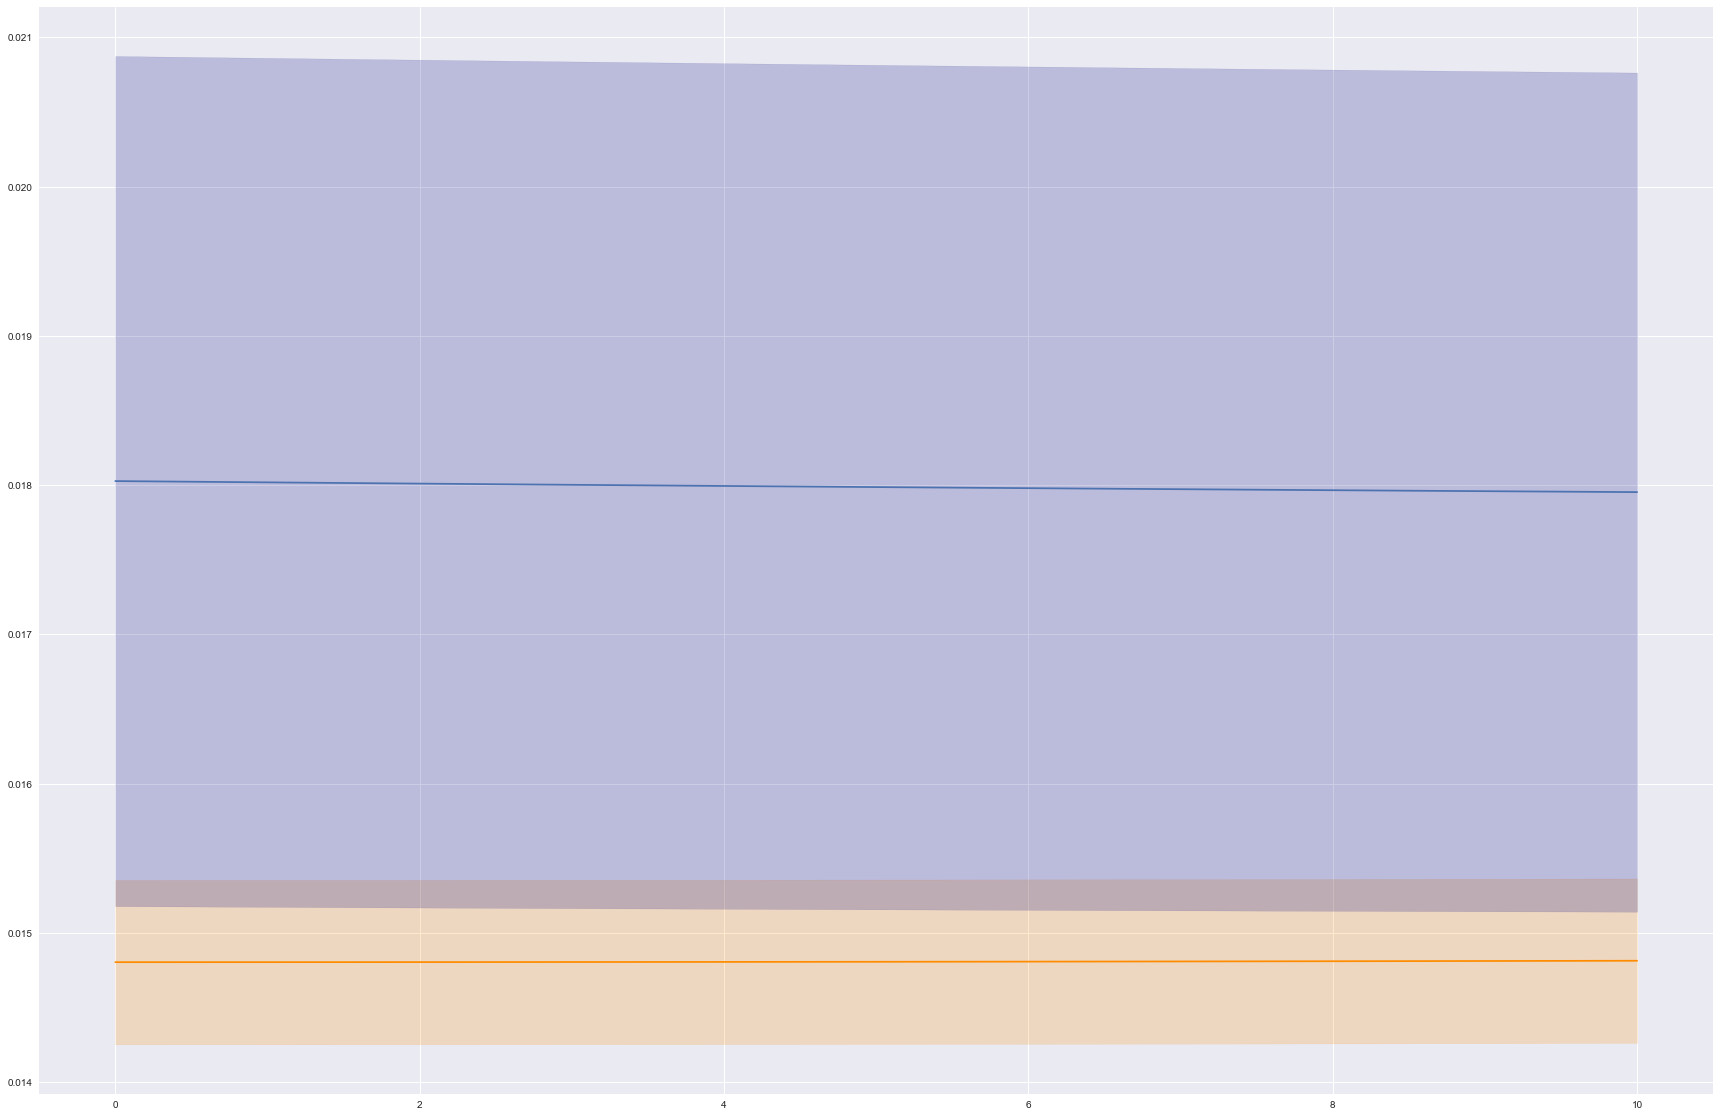

In [24]:
# Train mean and standard deviation
train_color = "darkorange"
plt.plot(param_range_ridge, train_scores_mean, color=train_color)
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range_ridge, y1=train_y1, y2=train_y2, color=train_color, alpha=0.2)

# Test mean and standard deviation
test_color = "navy"
plt.plot(param_range_ridge, test_scores_mean)
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.fill_between(param_range_ridge, y1=test_y1, y2=test_y2, color=test_color, alpha=0.2)
plt.show()

In [25]:
ridge_best = para_search_ridge.best_estimator_
ridge_best.fit(x_df, y_df)
ridge_best.score(x_df, y_df)
#print(ridge_best.coef_)
#print(ridge_best.intercept_)
ridge_best = ridge_best.coef_
ridge_best

array([ 5.33847041e-04,  2.50523464e-06, -1.93901338e-03,  3.42871299e-04,
       -2.80795147e-03,  1.94026098e-02, -1.18652510e-02, -1.60751349e-02,
       -6.08222995e-03,  6.39530240e-03,  2.37052326e-02, -4.91677134e-03,
       -2.67322684e-03,  3.56369957e-02,  1.57824457e-02,  3.85650380e-02,
        2.73082509e-02, -1.42522159e-02, -2.51170146e-02,  8.31751502e-02,
       -7.08776275e-02, -8.93563770e-02,  5.45897676e-02,  2.30277987e-02,
       -7.69166931e-03, -3.48299006e-02, -9.10387830e-03,  2.49872354e-02,
       -2.72933171e-02, -9.72809094e-03, -3.37373745e-02, -3.78787960e-02,
       -1.04020557e-02, -2.38981052e-02, -6.86960183e-02, -3.59198963e-02,
       -5.91537932e-02,  1.49251172e-02, -6.05783511e-03, -4.19614917e-02,
       -3.15025421e-02,  8.11426862e-02,  1.26406926e-02, -9.04667845e-03,
       -1.14266215e-02,  5.96161103e-02, -1.99746511e-02, -4.04959996e-02,
       -1.90906343e-03, -2.49562230e-03, -3.84885807e-02,  2.43195826e-03,
       -1.70817221e-02,  

In [26]:
ridge_df = pd.DataFrame({'a':x_df.columns.values, 'b':ridge_best})
ridge_df.to_csv("ridge_coef.csv")

## Lasso

In [60]:
# Lasso
lasso = linear_model.Lasso(random_state=9)
alphas_lasso = np.logspace(-4, 1, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(x_scale, y_df)
    coef_lasso.append(lasso.coef_)

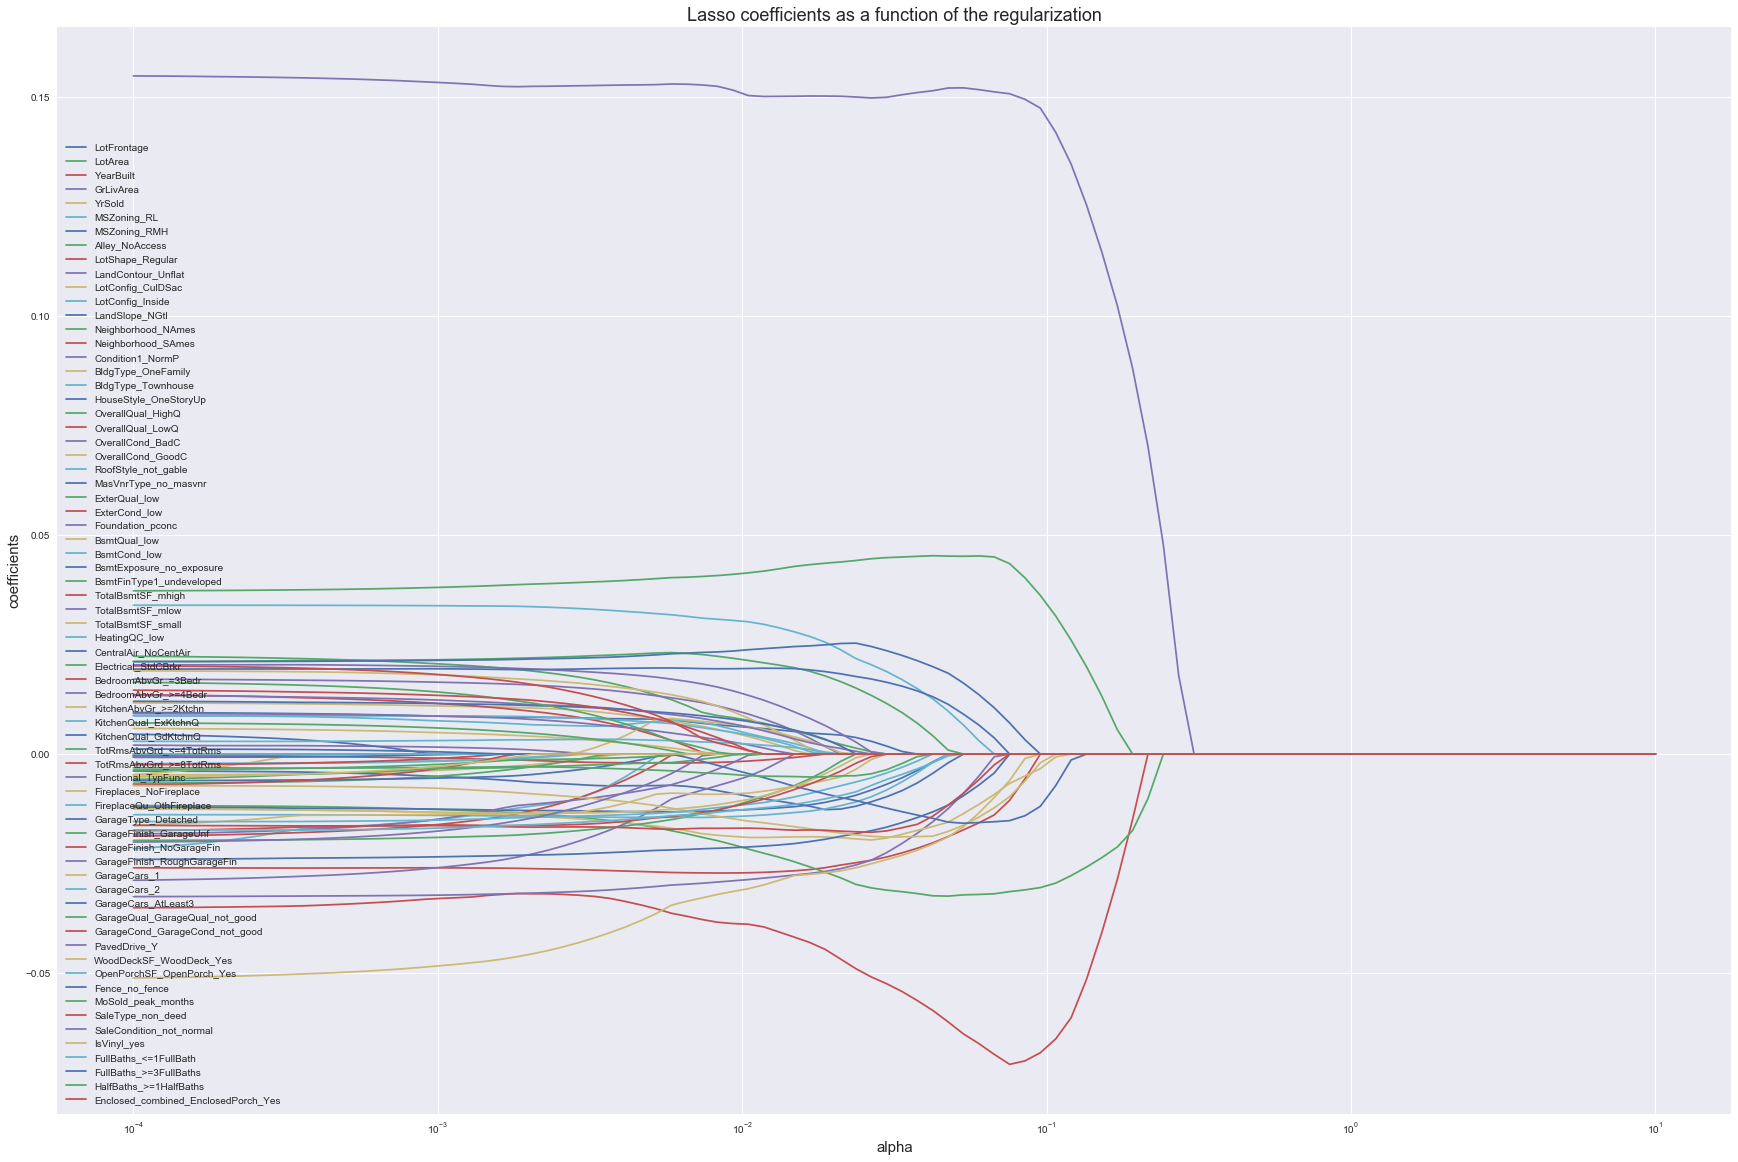

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30, 20)
df_coef_lasso = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=x_df.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef_lasso.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV
grid_param = [{'alpha': np.logspace(-5, 1, 100)}]
para_search = GridSearchCV(estimator=lasso, param_grid=grid_param, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
para_search = para_search.fit(x_scale, y_df)

In [30]:
#para_search.grid_scores_

In [63]:
print('Lasso MSE:',-para_search.best_score_)
print(para_search.best_params_)
print('Lasso RMSE:',np.sqrt(-para_search.best_score_))

Lasso MSE: 0.017844486105582764
{'alpha': 0.0011497569953977356}
Lasso RMSE: 0.13358325533382828


In [64]:
para_search.cv_results_['params'][para_search.best_index_]

{'alpha': 0.0011497569953977356}

In [65]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-5, -1, 100)
kwargs = dict(param_name='alpha', param_range=param_range)
train_scores_lasso, test_scores_lasso = validation_curve(lasso, x_scale, y_df,scoring='neg_mean_squared_error',cv=5,**kwargs)
train_scores_mean = np.mean(-train_scores_lasso, axis=1)
train_scores_std = np.std(-train_scores_lasso, axis=1)
test_scores_mean = np.mean(-test_scores_lasso, axis=1)
test_scores_std = np.std(-test_scores_lasso, axis=1)
print('test sd:',np.std(test_scores_lasso))
print('test MSE:',np.mean(-test_scores_lasso))
print('train MSE:',np.mean(-train_scores_lasso))

test sd: 0.007916983048060308
test MSE: 0.021035078002136907
train MSE: 0.018406423921089994


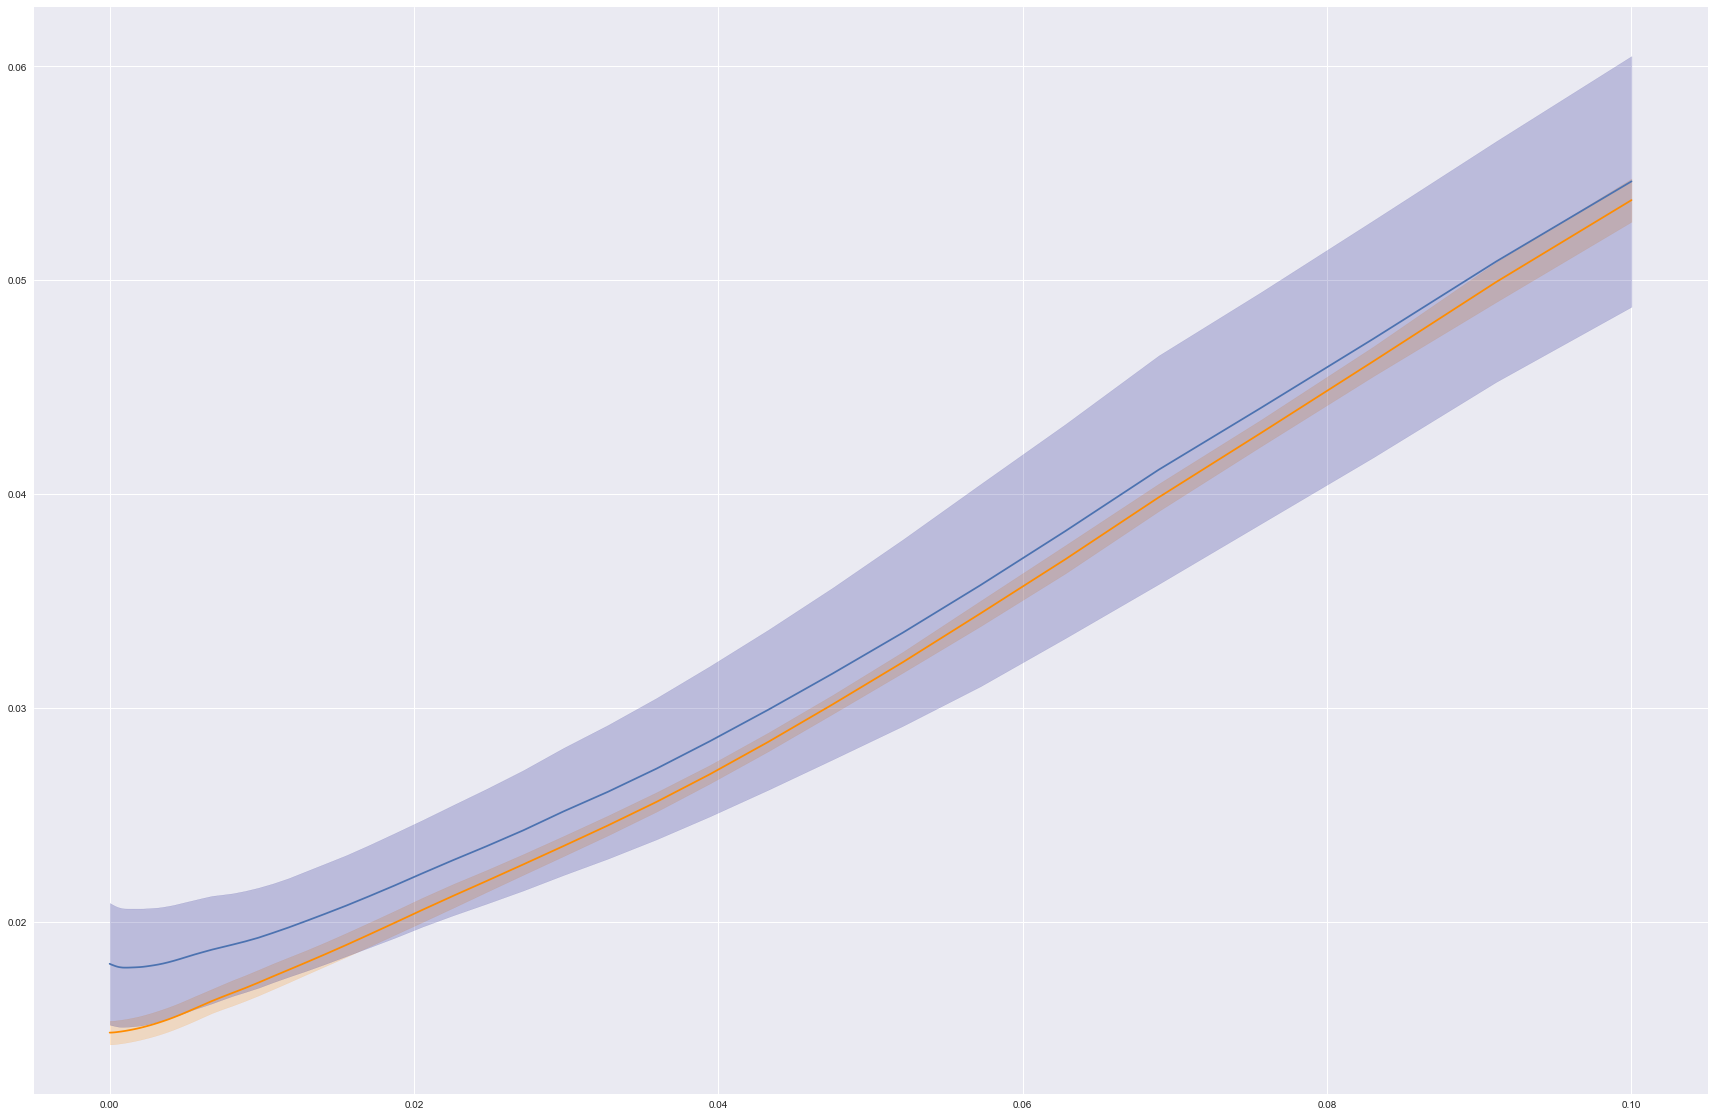

In [34]:
# Train mean and standard deviation
train_color = "darkorange"
plt.plot(param_range, train_scores_mean, color=train_color)
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color=train_color, alpha=0.2)

# Test mean and standard deviation
test_color = "navy"
plt.plot(param_range, test_scores_mean)
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color=test_color, alpha=0.2)
plt.show()

In [35]:
x_scale

array([[ 0.81574508, -0.12316959, -0.05903553, ..., -0.54723417,
        -0.83979947, -0.55252331],
       [-0.46793508, -0.33076274,  0.70297279, ..., -0.54723417,
         1.19076045,  1.8098784 ],
       [ 0.19767686, -0.19561412,  0.5704496 , ..., -0.54723417,
         1.19076045, -0.55252331],
       ...,
       [ 1.33872589,  0.18223382, -0.75478226, ...,  1.82737126,
         1.19076045, -0.55252331],
       [ 1.19609476,  0.08980109,  0.76923438, ..., -0.54723417,
        -0.83979947, -0.55252331],
       [-0.46793508, -0.41173016,  1.69689669, ..., -0.54723417,
        -0.83979947,  1.8098784 ]])

In [36]:
pd.DataFrame(x_scale, columns=x_df.columns).describe()

,LotFrontage,LotArea,YearBuilt,GrLivArea,YrSold,MSZoning_RL,MSZoning_RMH,Alley_NoAccess,LotShape_Regular,LandContour_Unflat,...,OpenPorchSF_OpenPorch_Yes,Fence_no_fence,MoSold_peak_months,SaleType_non_deed,SaleCondition_not_normal,IsVinyl_yes,FullBaths_<=1FullBath,FullBaths_>=3FullBaths,HalfBaths_>=1HalfBaths,Enclosed_combined_EnclosedPorch_Yes
count,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,...,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03
mean,-8.593187e-17,4.431754e-17,2.665144e-17,-1.922711e-16,1.496730e-14,-2.237198e-16,-6.853229e-17,-3.367981e-16,6.518182e-17,-2.733677e-17,...,2.421474e-16,2.351419e-16,1.489435e-16,-1.059205e-16,-8.010663e-17,3.254522e-16,-2.984962e-17,-8.056351e-17,-6.548641e-18,1.294499e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.322140e+00,-9.293940e-01,-1.284875e+00,-2.317226e+00,-1.367230e+00,-1.928327e+00,-4.372373e-01,-3.875820e+00,-1.317368e+00,-3.348554e-01,...,-1.105695e+00,-2.046610e+00,-9.491642e-01,-3.835730e-01,-4.658630e-01,-7.412257e-01,-5.852704e-01,-5.472342e-01,-8.397995e-01,-5.525233e-01
25%,-4.679351e-01,-2.958088e-01,-9.535670e-01,-7.523389e-01,-6.144272e-01,5.185841e-01,-4.372373e-01,2.580099e-01,-1.317368e+00,-3.348554e-01,...,-1.105695e+00,4.886129e-01,-9.491642e-01,-3.835730e-01,-4.658630e-01,-7.412257e-01,-5.852704e-01,-5.472342e-01,-8.397995e-01,-5.525233e-01
50%,9.877225e-03,-9.993458e-02,-4.247014e-02,-9.644532e-02,1.383752e-01,5.185841e-01,-4.372373e-01,2.580099e-01,7.590891e-01,-3.348554e-01,...,9.044087e-01,4.886129e-01,-9.491642e-01,-3.835730e-01,-4.658630e-01,-7.412257e-01,-5.852704e-01,-5.472342e-01,-8.397995e-01,-5.525233e-01
75%,4.353954e-01,1.156741e-01,5.704496e-01,5.230097e-01,8.911776e-01,5.185841e-01,-4.372373e-01,2.580099e-01,7.590891e-01,-3.348554e-01,...,9.044087e-01,4.886129e-01,1.053559e+00,-3.835730e-01,-4.658630e-01,1.349117e+00,1.708612e+00,-5.472342e-01,1.190760e+00,-5.525233e-01
max,1.156062e+01,2.077809e+01,3.287175e+00,5.841066e+00,1.643980e+00,5.185841e-01,2.287087e+00,2.580099e-01,7.590891e-01,2.986364e+00,...,9.044087e-01,4.886129e-01,1.053559e+00,2.607066e+00,2.146554e+00,1.349117e+00,1.708612e+00,1.827371e+00,1.190760e+00,1.809878e+00


In [85]:
lasso_best = para_search.best_estimator_
lasso_best.fit(x_df, y_df)
lasso_best.score(x_df, y_df)
#print(lasso_best.coef_)
#print(lasso_best.intercept_)
lasso_best

Lasso(alpha=0.0011497569953977356, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=9, selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
#list((zip(x_df.columns,lasso_best)))
#pd.concat(pd.DataFrame(x_df.columns.values),pd.DataFrame(lasso_best.reshape(-1,1)))
lasso_df = pd.DataFrame({'a':x_df.columns.values, 'b':lasso_best})
lasso_df.to_csv("lasso_coef.csv")

In [39]:
lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

## Decision Tree

In [40]:
# Decision Tree initial fit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor()
tree.fit(x_df,y_df)
print("MSE: %.3f" % (mean_squared_error(y_df,tree.predict(x_df))))
print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_df,tree.predict(x_df))))

MSE: 0.000
RMSE: 0.0016


In [76]:
from sklearn.model_selection import cross_val_score
scoresTree = cross_val_score(tree, x_df, y_df, scoring='neg_mean_squared_error',cv=5)
print("MSE:",np.mean(-scoresTree))
print("RMSE:", np.sqrt(np.mean(-scoresTree)))
print("SD:", scoresTree.std())

MSE: 0.04404612047997022
RMSE: 0.2098716762213763
SD: 0.007114652917436269


## Random Forest

In [78]:
# Random Forest initial fit
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_df,y_df)
print("MSE: %.3f" % (mean_squared_error(y_df,tree.predict(x_df))))
print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_df,tree.predict(x_df))))

MSE: 0.000
RMSE: 0.0016


In [79]:
# forest with CV
scoresForest = cross_val_score(forest, x_df, y_df, scoring='neg_mean_squared_error',cv=5)
print("MSE:",np.mean(-scoresForest))
print("RMSE:", np.sqrt(np.mean(-scoresForest)))
print("SD:", scoresForest.std())

MSE: 0.024266621727778288
RMSE: 0.15577747503338948
SD: 0.0036824003390752685


In [88]:
param_grid = [{
    "n_estimators": [25, 50, 100],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [9]}]
forest_search = GridSearchCV(forest, param_grid,cv=5,scoring='neg_mean_squared_error')
forest_search.fit(x_df,y_df)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [25, 50, 100], 'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'random_state': [9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
print('Forest MSE:',-forest_search.best_score_)
print(forest_search.best_params_)
print('Forest RMSE:',np.sqrt(-forest_search.best_score_))

Forest MSE: 0.02081632444172855
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 9}
Forest RMSE: 0.14427863473754024


In [111]:
forest_refit = RandomForestRegressor(min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=9)
forest_refit.fit(x_df,y_df)
feature = pd.DataFrame({'feature':x_df.columns.values,'Importance':forest_refit.feature_importances_})
feature.sort_values(by='Importance',ascending=False).head(10)

,Importance,feature
25,0.316345,ExterQual_low
3,0.240714,GrLivArea
19,0.093804,OverallQual_HighQ
2,0.056869,YearBuilt
1,0.036862,LotArea
36,0.027866,CentralAir_NoCentAir
54,0.019122,GarageCars_AtLeast3
20,0.016140,OverallQual_LowQ
0,0.015889,LotFrontage
34,0.014931,TotalBsmtSF_small


## Boosting

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

gbrt = GradientBoostingRegressor(max_depth=2,warm_start=True)

x_train, x_val, y_train, y_val = train_test_split(x_df, y_df)

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_df, y_df)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 5:
            break # early stopping

In [117]:
gbrt.fit(x_df,y_df)
print("GBRT MSE: %.3f" % (np.sum(((y_df) - (gbrt.predict(x_df))) ** 2)/len(y_df)))
print("GBRT RMSE: %.4f" % np.sqrt(np.sum(((y_df) - (gbrt.predict(x_df))) ** 2)/len(y_df)))
print("GBRT R^2: %f" %(gbrt.score(x_df, y_df)))

GBRT MSE: 0.078
GBRT RMSE: 0.2790
GBRT R^2: 0.512508


### Group Model

In [45]:
# x_group = sm.add_constant(x_grouptrain)
# y_group = y_grouptrain
# model_group = sm.OLS(y_group, x_group).fit()
# #print(model_fit.summary())

In [46]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x_grouptrain, y_grouptrain)
print("Group Model")
print(10*"~")
print("Train RSS: %.2f" % np.sum(((y_grouptrain) - (ols.predict(x_grouptrain))) ** 2))
print("Train MSE: %.3f" % (np.sum(((y_grouptrain) - (ols.predict(x_grouptrain))) ** 2)/len(y_grouptrain)))
print("Train RMSE: %.4f" % np.sqrt(np.sum(((y_grouptrain) - (ols.predict(x_grouptrain))) ** 2)/len(y_grouptrain)))
#print("Intercept: %f" %ols.intercept_)
#print("Coefficients: %s" %str(ols.coef_))
print("Train R^2: %f" %(ols.score(x_grouptrain, y_grouptrain)))
print(10*"~")
print("Test RSS: %.2f" % np.sum(((y_grouptest) - (ols.predict(x_grouptest))) ** 2))
print("Test MSE: %.3f" % (np.sum(((y_grouptest) - (ols.predict(x_grouptest))) ** 2)/len(y_grouptest)))
print("Test RMSE: %.4f" % np.sqrt(np.sum(((y_grouptest) - (ols.predict(x_grouptest))) ** 2)/len(y_grouptest)))
print("Test R^2: %f" %(ols.score(x_grouptest, y_grouptest)))

Group Model
~~~~~~~~~~
Train RSS: 16.80
Train MSE: 0.014
Train RMSE: 0.1200
Train R^2: 0.906910
~~~~~~~~~~
Test RSS: 6.32
Test MSE: 0.022
Test RMSE: 0.1471
Test R^2: 0.878756


In [47]:
# select according to f regression
best20 = fs.SelectKBest(fs.f_regression, k=20).fit_transform(x_grouptrain, y_grouptrain)
x_ptrain.columns[fs.SelectKBest(fs.f_regression, k=10).fit(x_grouptrain, y_grouptrain).get_support()]

NameError: name 'fs' is not defined

In [ ]:
# Ridge
from sklearn import linear_model
ridge_group = linear_model.Ridge()

alpha_100 = np.logspace(0, 8, 100)
coef_group = []
for i in alpha_100:
    ridge_group.set_params(alpha = i)
    ridge_group.fit(x_grouptrain, y_grouptrain)
    coef_group.append(ridge_group.coef_)

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30, 20)
df_coef = pd.DataFrame(coef_group, index=alpha_100, columns=x_grouptrain.columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
#plt.show()

In [ ]:
# Lasso
lasso_group = linear_model.Lasso()
alphas_lasso = np.logspace(-5, 1, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso_group.set_params(alpha=i).fit(x_grouptrain, y_grouptrain)
    coef_lasso.append(lasso_group.coef_)

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30, 20)
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=x_grouptrain.columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

### Phoebe Model

In [ ]:
P_ols = LinearRegression()
P_ols.fit(x_ptrain, y_ptrain)
print("Phoebe Model")
print(10*"~")
print("Train RSS: %.2f" % np.sum(((y_ptrain) - (P_ols.predict(x_ptrain))) ** 2))
print("Train MSE: %.3f" % (np.sum(((y_ptrain) - (ols.predict(x_ptrain))) ** 2)/len(y_ptrain)))
print("Train RMSE: %.4f" % np.sqrt(np.sum(((y_ptrain) - (P_ols.predict(x_ptrain))) ** 2)/len(y_ptrain)))
#print("Intercept: %f" %ols.intercept_)
#print("Coefficients: %s" %str(ols.coef_))
print("Train R^2: %f" %(P_ols.score(x_ptrain, y_ptrain)))
print(10*"~")
print("Test RSS: %.2f" % np.sum(((y_ptest) - (P_ols.predict(x_ptest))) ** 2))
print("Test MSE: %.3f" % (np.sum(((y_ptest) - (P_ols.predict(x_ptest))) ** 2)/len(y_ptest)))
print("Test RMSE: %.4f" % np.sqrt(np.sum(((y_ptest) - (P_ols.predict(x_ptest))) ** 2)/len(y_ptest)))
print("Test R^2: %f" %(P_ols.score(x_ptest, y_ptest)))

In [ ]:
# feature selection
import sklearn.feature_selection as fs
import pprint
print('Shape: (%d, %d)' %p_train.shape)
print('Variation:')
pprint.pprint(dict(zip(p_train.columns, np.var(p_train, 0))))

In [ ]:
# select according to variance threshold
select = fs.VarianceThreshold(threshold = 1).fit_transform(df)
print(select.shape)

In [ ]:
# a = zip(x_ptrain.iloc[0,:],x_ptrain.columns)
# for t in a:
#     print(t)

In [ ]:
# select according to f regression
best20 = fs.SelectKBest(fs.f_regression, k=20).fit_transform(x_ptrain, y_ptrain)
x_ptrain.columns[fs.SelectKBest(fs.f_regression, k=10).fit(x_ptrain, y_ptrain).get_support()]

### other